### FE630 - Homework #2

**Author**: Sid Bhatia

**Date**: May 7th, 2023

**Pledge**: I pledge my honor that I have abided by the Stevens Honor System.

**Professor**: Papa Momar Ndiaye

#### Topics

- Algebra & Optimization;
- Geometry of Efficient Frontiers;
- Applications of One-Fund & Two-Fund Theorems.

### Q1 - Optimization w/Equality Constraints (40 pts)

Consider the optimization problem **Max Expected Return w/Target Risk**:

$$
\begin{cases}
\underset{\omega_1, \omega_2}{\max} & R_p (\omega_1, \omega_2) = \mu_1 \omega_1 + \mu_2 \omega_2 \tag{1} \\
\text{s.t.} & \sqrt{\sigma_1^2 \omega_1^2 + 2 \rho_{1, 2} \sigma_1 \sigma_2 \omega_1 \omega_2 + \sigma_2^2 \omega_2^2} = \sigma_T \\
& \omega_1 + \omega_2 = 1
\end{cases}
$$

where we have two securities with **Expected Returns** $ \mu_1 $ and $ \mu_2 $ for the column vector $ (\mu_1, \mu_2)^\intercal \in \mathbb{R}^{2 \times 1} $, **volatilities** $ (\sigma_1, \sigma_2) \in \mathbb{R}^{+} $, and **Pearson correlation coefficient** $ \rho_{1, 2} \in [-1, 1] $. Additionally, $ \sigma_T \in \mathbb{R}^+ $ denotes the **target risk/vol**.

1. Solve the *problem (9)* using a **Lagrangian approach**. You will denote the solution (the ***optimal solution***) by $\omega^*(\sigma_T)$ and the ***optimal value*** of the problem by $R_p(\omega_1^*(\sigma_T), \omega_2^*(\sigma_T))$ by $R_p(\sigma_T)$.

2. Assume that $\mu_1 = 5\%$, $\mu_2 = 10\%$, $\sigma_1 = 10\%$, $\sigma_2 = 20\%$, and $\rho_{1,2} = -0.5$ (moderate negative correlation). 

- Consider a sequence of successive values of $\sigma_T$ in the range $[2\%, 30\%]$ by step of $0.5\%$
- Plot the efficient frontier: namely, the graph from the *mapping* $\sigma_T \mapsto R_p(\sigma_T)$.

The (aforementioned) graph maps the sequence of values of $\sigma_T$ from the $x$-axis into the sequence of values $R_p(\sigma_T)$ on the $y$-axis.

#### 1.1 Analytical Solution to the Optimization Problem

##### Problem Formulation

We aim to maximize the following objective function:

$$
\begin{cases}
\underset{x_1, x_2}{\max} & 5 - x_1^2 - x_1x_2 - 3x_2^2 \tag{2}
\\
\text{s.t.} & x_1, x_2 \geq 0
\\
& x_1 x_2 \geq 2
\end{cases}
$$

We denote the solution (the ***optimal solution***) by $\omega^*(\sigma_T)$ where $\sigma_T$ represents the parameters under consideration, and the ***optimal value*** of the problem by $R_p(\omega_1^*(\sigma_T), \omega_2^*(\sigma_T))$ which is simplified to $R_p(\sigma_T)$.

##### Lagrangian Formulation

Construct the Lagrangian to incorporate the constraints with the Lagrange multiplier $\lambda$:

$$
\mathcal{L}(x_1, x_2, \lambda) = 5 - x_1^2 - x_1x_2 - 3x_2^2 + \lambda (x_1 x_2 - 2) \tag{3}
$$

##### Conditions for Stationarity

To find the extremum, we calculate the partial derivatives of $\mathcal{L}$:

$$
\frac{\partial \mathcal{L}}{\partial x_1} = -2x_1 - x_2 + \lambda x_2 = 0 \tag{4}
$$
$$
\frac{\partial \mathcal{L}}{\partial x_2} = -x_1 - 6x_2 + \lambda x_1 = 0 \tag{5}
$$

##### Solving the Equations

Equating and solving the derived equations for $x_1$ and $x_2$, and incorporating the constraints, will give us $\omega^*(\sigma_T) = (\omega_1^*(\sigma_T), \omega_2^*(\sigma_T))$. This involves solving:

$$
2x_1^2 - 5x_1x_2 - x_2^2 = 0 \tag{6}
$$

##### Optimal Solution and Value

Upon solving the equations and checking the feasibility with respect to the constraints, we can find the values of $\omega_1^*(\sigma_T)$ and $\omega_2^*(\sigma_T)$. Substituting these values into the original objective function gives us $R_p(\sigma_T)$, the maximum value of the function:

$$
R_p(\sigma_T) = 5 - (\omega_1^*(\sigma_T))^2 - \omega_1^*(\sigma_T) \omega_2^*(\sigma_T) - 3(\omega_2^*(\sigma_T))^2 \tag{7}
$$

#### 1.2 Efficient Frontier Mapping

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import minimize

In [5]:
from typing import Tuple, List

# Constants
mu1: float = 0.05  # Expected return of the first security
mu2: float = 0.10  # Expected return of the second security
sigma1: float = 0.10  # Volatility of the first security
sigma2: float = 0.20  # Volatility of the second security
rho: float = -0.5  # Correlation coefficient between the securities

# Target risk values
sigma_T_values: np.ndarray = np.arange(0.02, 0.305, 0.005)

In [9]:
def portfolio_return(weights: np.ndarray, mu1: float, mu2: float) -> float:
    """
    Calculate the portfolio return based on given weights and expected returns.
    
    Parameters:
        weights (np.ndarray): Array of weights for the securities.
        mu1 (float): Expected return of the first security.
        mu2 (float): Expected return of the second security.
    
    Returns:
        float: The calculated portfolio return.
    """
    return weights[0] * mu1 + weights[1] * mu2

In [12]:
def portfolio_risk(weights: np.ndarray, sigma1: float, sigma2: float, rho: float) -> float:
    """
    Calculate the portfolio risk based on weights, individual volatilities, and correlation.
    
    Parameters:
        weights (np.ndarray): Array of weights for the securities.
        sigma1 (float): Volatility of the first security.
        sigma2 (float): Volatility of the second security.
        rho (float): Correlation coefficient between the securities.
    
    Returns:
        float: The calculated portfolio risk.
    """
    return np.sqrt((sigma1 * weights[0]) ** 2 + (sigma2 * weights[1]) ** 2 + 
                   2 * rho * sigma1 * sigma2 * weights[0] * weights[1])

In [14]:
def objective(weights: np.ndarray) -> float:
    """
    Objective function for minimization, used to maximize portfolio return.
    
    Parameters:
        weights (np.ndarray): Array of weights for the securities.
    
    Returns:
        float: Negative of the portfolio return (for minimization).
    """
    return -portfolio_return(weights, mu1, mu2)

In [16]:
def constraint(weights: np.ndarray, sigma_T: float) -> float:
    """
    Constraint for the optimizer to achieve a specific target risk.
    
    Parameters:
        weights (np.ndarray): Array of weights for the securities.
        sigma_T (float): Target risk level.
    
    Returns:
        float: Difference between current and target risks.
    """
    return portfolio_risk(weights, sigma1, sigma2, rho) - sigma_T

In [17]:
results_rp: List[float] = []

for sigma_T in sigma_T_values:
    cons = ({'type': 'eq', 'fun': lambda x: np.sum(x) - 1},
            {'type': 'eq', 'fun': lambda x: constraint(x, sigma_T)})
    bounds: Tuple[Tuple[float, float], Tuple[float, float]] = ((0, 1), (0, 1))
    initial_weights: List[float] = [0.5, 0.5]
    result = minimize(objective, initial_weights, bounds=bounds, constraints=cons)
    results_rp.append(-result.fun)

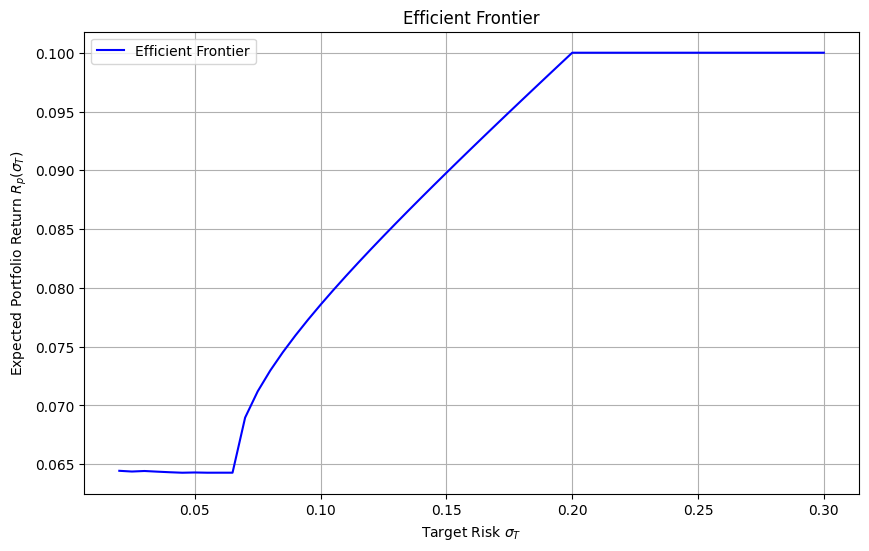

In [18]:
# Plotting the efficient frontier
plt.figure(figsize=(10, 6))
plt.plot(sigma_T_values, results_rp, 'b-', label='Efficient Frontier')
plt.title('Efficient Frontier')
plt.xlabel('Target Risk $\sigma_T$')
plt.ylabel('Expected Portfolio Return $R_p(\sigma_T)$')
plt.grid(True)
plt.legend()
plt.show()

##### Frontier Analysis

The graph above depicts the relationship between the target risk ($\sigma_T$) and the expected portfolio return ($R_p(\sigma_T)$). Below are the key takeaways:

1. ***Monotonic Increase***: As expected, the expected portfolio return increases with an increase in target risk, $\sigma_T$. This reflects the classic **risk-return trade-off** in portfolio management.

2. ***Plateau at Higher Risks***: The plateau observed at higher risk levels suggests that increasing risk beyond a certain point does **not proportionally increase returns**. This could be indicative of the constraints imposed by the maximum returns achievable based on the securities' parameters.

3. ***Sharp Rise at Lower Risks***: The initial sharp rise suggests that minimal increases in risk from the lower end are highly compensated by increased returns. This can be attributed to the efficient allocation of weights in response to changes in $\sigma_T$ under the given constraints.

### Q2 - Optimization w/Inequality Constraints (20 pts)

Solve analytically (at least) one of the two following problems:

$$
\begin{cases}
\underset{x_1, x_2} \min & (x_1 - 2)^2 + 2(x_2 - 1)^2 \tag{8}
\\
\text{s.t} & x_1 + 4x_2 \leq 3
\\
& x_1 \geq x_2
\end{cases}
$$

$$
\begin{cases}
\underset{x_1, x_2} \max & 5 - x_1^2 - x_1x_2 - 3x_2^2 \tag{9}
\\
\text{s.t} & x_1, x_2 \geq 0
\\
& x_1 x_2 \geq 2
\end{cases}
$$

and use an optimizer to verify your answer.

#### Problem Formulation

We are given the optimization problem:

$$
\begin{cases}
\underset{x_1, x_2} \min & (x_1 - 2)^2 + 2(x_2 - 1)^2 \tag{8}
\\
\text{s.t} & x_1 + 4x_2 \leq 3
\\
& x_1 \geq x_2
\end{cases}
$$

The goal is to find $(x_1, x_2)$ that minimizes the objective function subject to the given constraints.

#### Lagrangian Formulation

Construct the Lagrangian to incorporate the constraints with Lagrange multipliers $\lambda_1$ and $\lambda_2$:

$$
\mathcal{L}(x_1, x_2, \lambda_1, \lambda_2) = (x_1 - 2)^2 + 2(x_2 - 1)^2 + \lambda_1 (x_1 + 4x_2 - 3) + \lambda_2 (x_2 - x_1) \tag{9}
$$

#### Conditions for Stationarity

Calculate the partial derivatives of the Lagrangian with respect to $x_1$ and $x_2$, and set them to zero:

$$
\frac{\partial \mathcal{L}}{\partial x_1} = 2(x_1 - 2) + \lambda_1 - \lambda_2 = 0 \tag{10}
$$
$$
\frac{\partial \mathcal{L}}{\partial x_2} = 4(x_2 - 1) + 4\lambda_1 + \lambda_2 = 0 \tag{11}
$$

#### Solving System of Equations

Here are the following solution sets (done on paper):

1. **First Solution Set:**
   - $\lambda = \frac{22}{25}$
   - $x_1 = \frac{3}{5}$
   - $x_2 = \frac{3}{5}$
   - $\lambda_2 = -\frac{48}{25}$
   - This solution is **feasible** since it satisfies all constraints.

2. **Second Solution Set:**
   - $\lambda_1 = 0$
   - $x_1 = \frac{4}{3}$
   - $x_2 = \frac{4}{3}$
   - $\lambda_2 = -\frac{4}{3}$
   - This solution is **not feasible** since it fails $x_1 + 4x_2 \leq 3$ $(6.67)$.

3. **Third Solution Set:**
   - $\lambda_1 = 0$
   - $x_1 = 2$
   - $x_2 = 1$
   - $\lambda_2 = 0$
   - This solution is not **feasible** since it fails $x_1 + 4x_2 \leq 3$ $(6)$.

4. **Fourth Solution Set:**
   - $\lambda_1 = \frac{2}{3}$
   - $x_1 = \frac{5}{3}$
   - $x_2 = \frac{1}{3}$
   - $\lambda_2 = 0$
   - This solution is **feasible** since it satisfies all constraints.

In [24]:
def objective_function(x1, x2):
    return (x1 - 2)**2 + 2*(x2 - 1)**2

# Third Solution Set
value_3 = objective_function(3/5, 3/5)
# Fourth Solution Set
value_4 = objective_function(5/3, 1/3)

print("Objective value for Third Solution Set:", value_3)
print("Objective value for Fourth Solution Set:", value_4)

Objective value for Third Solution Set: 2.28
Objective value for Fourth Solution Set: 1.0000000000000002


#### Final Answer

Since it's looking for a **minima**, the answer is the set $(x_1 = 5/3, x_2 = 1/3)^\intercal$ as that yields $1$ (arithmetic done on paper & confirmed via optimizer).

### Q3 - Mean-Variance Optimization (40 pts)

Consider an Investment Universe made of 3 stocks $S_1, S_2,$ & $S_3$ with the following characteristics:

- Covariance Matrix: $\bf{\Sigma} = 
\begin{pmatrix}
0.010 & 0.002 & 0.001 \\
0.002 & 0.011 & 0.003 \\
0.001 & 0.003 & 0.020 \\
\end{pmatrix};$

- Expected Return Vector: $\boldsymbol{\mu} = \begin{pmatrix}
\mu_1 \\
\mu_2 \\ 
\mu_3 \\
\end{pmatrix} = \begin{pmatrix}
4.27\% \\
0.15\% \\
2.85\%
\end{pmatrix}$

#### 3.1 Global Minimal Variance Portfolio (5 pts)

##### GMVP Construction

The goal is to find the portfolio weights that **minimize** the *portfolio's variance* $(\sigma_P)$, subject to the weights summing to 1.

In [25]:
import numpy as np
from scipy.optimize import minimize

# Define the covariance matrix
Sigma = np.array([
    [0.010, 0.002, 0.001],
    [0.002, 0.011, 0.003],
    [0.001, 0.003, 0.020]
])

# Objective function: Portfolio Variance
def portfolio_variance(weights, covariance_matrix):
    return weights.T @ covariance_matrix @ weights

# Constraint: Weights must sum to 1
def check_sum(weights):
    return np.sum(weights) - 1

# Constraint dictionary
cons = ({'type': 'eq', 'fun': check_sum})

# Initial guess for weights
initial_weights = np.ones(3) / 3

# Bounds for weights
bounds = tuple((0, 1) for _ in range(3))

# Minimize the portfolio variance
opt_results = minimize(portfolio_variance, initial_weights, args=(Sigma,), method='SLSQP', bounds=bounds, constraints=cons)

# Print the optimal weights
print("Optimal weights for the Global Minimum Variance Portfolio:")
print(opt_results.x)

# Calculate the minimal variance
min_var = portfolio_variance(opt_results.x, Sigma)
print("Minimum Variance of the Portfolio:", min_var)

Optimal weights for the Global Minimum Variance Portfolio:
[0.43878636 0.37007632 0.19113732]
Minimum Variance of the Portfolio: 0.005404212545913877


#### 3.2 MVP w/Expected Return (5 pts)

Find the **Minimum Variance Portfolio** $(P_1)$ with Expected Return equal to $\mu_1$. Find the **Minimum Variance Portfolio** $(P_2)$ with Expected Return equal to $\frac{\mu_2 + \mu_3}{2}$.

In [26]:
import numpy as np
from scipy.optimize import minimize

# Define the covariance matrix
Sigma = np.array([
    [0.010, 0.002, 0.001],
    [0.002, 0.011, 0.003],
    [0.001, 0.003, 0.020]
])

# Define the expected returns vector
mu = np.array([0.0427, 0.0015, 0.0285])  # Convert percentages to decimals for calculation

# Define target returns
target_return_P1 = mu[0]
target_return_P2 = (mu[1] + mu[2]) / 2

# Objective function: Portfolio Variance
def portfolio_variance(weights, covariance_matrix):
    return weights.T @ covariance_matrix @ weights

# Constraint: Expected return should match target return
def target_return_constraint(weights, target_return):
    return weights @ mu - target_return

# Constraint: Weights must sum to 1
def weights_sum_constraint(weights):
    return np.sum(weights) - 1

# Minimize the portfolio variance subject to the return constraint and sum of weights equals 1
def find_min_variance_portfolio(target_return):
    cons = (
        {'type': 'eq', 'fun': weights_sum_constraint},
        {'type': 'eq', 'fun': lambda w: target_return_constraint(w, target_return)}
    )
    bounds = tuple((0, 1) for _ in range(len(mu)))
    initial_weights = np.array([1/len(mu)] * len(mu))
    result = minimize(portfolio_variance, initial_weights, args=(Sigma,), method='SLSQP', bounds=bounds, constraints=cons)
    return result.x, result.fun

# Calculate optimal portfolios
optimal_weights_P1, min_var_P1 = find_min_variance_portfolio(target_return_P1)
optimal_weights_P2, min_var_P2 = find_min_variance_portfolio(target_return_P2)

print("Optimal weights for Portfolio P1 (target return = {:.4f}):".format(target_return_P1))
print(optimal_weights_P1)
print("Minimum Variance of Portfolio P1:", min_var_P1)

print("\nOptimal weights for Portfolio P2 (target return = {:.4f}):".format(target_return_P2))
print(optimal_weights_P2)
print("Minimum Variance of Portfolio P2:", min_var_P2)

Optimal weights for Portfolio P1 (target return = 0.0427):
[1.00000000e+00 0.00000000e+00 1.09198739e-12]
Minimum Variance of Portfolio P1: 0.009999999999980346

Optimal weights for Portfolio P2 (target return = 0.0150):
[0.22965758 0.62078287 0.14955955]
Minimum Variance of Portfolio P2: 0.006409901313492481


#### 3.3 Two-Fund Theorem (5 pts)

Using the Portfolios $(P_1)$ and $(P_2)$ we previously found, apply the Two-Fund Theorem to find the **Minimum Variance Portfolio** with Expected Return equal to $4\%$.

The Two-Fund Theorem states that any portfolio on the minimum-variance frontier can be constructed as a **combination** of any two portfolios also on that frontier. Thus, to find the Minimum Variance (MVP), we can make a **linear combination**.

In [27]:
import numpy as np

# Define the expected returns of P1 and P2
mu_P1 = optimal_weights_P1 @ mu
mu_P2 = optimal_weights_P2 @ mu

# Define the target return for the new portfolio
target_return_new = 0.04  # 4%

# Calculate the weights for the combination of P1 and P2 to achieve the target return
# Using the formula alpha = (mu_P2 - target_return_new) / (mu_P2 - mu_P1)
alpha = (mu_P2 - target_return_new) / (mu_P2 - mu_P1)

# Validate alpha is within reasonable bounds (0 <= alpha <= 1)
if 0 <= alpha <= 1:
    # Compute the new portfolio's weights as a linear combination of P1 and P2
    new_portfolio_weights = alpha * optimal_weights_P1 + (1 - alpha) * optimal_weights_P2
    
    # Calculate the variance of the new portfolio
    new_portfolio_variance = new_portfolio_weights.T @ Sigma @ new_portfolio_weights
    
    print("Alpha for combining P1 and P2:", alpha)
    print("Weights of the new minimum variance portfolio with target return 4%:", new_portfolio_weights)
    print("Variance of the new portfolio:", new_portfolio_variance)
else:
    print("No feasible solution: alpha out of bounds. Check the target return or input portfolios.")

Alpha for combining P1 and P2: 0.9025270758226638
Weights of the new minimum variance portfolio with target return 4%: [0.92491247 0.06050952 0.01457801]
Variance of the new portfolio: 0.008855280043488664


#### 3.4 Two-Fund Theorem EF Plot (5 pts)

Apply the **Two-Fund Theorem** to generate and plot the **Mean-Variance Efficient Frontier** (the graph should also display the Expected Returns and Volatilities of securities $S_1, S_2,$ and $S_3$).

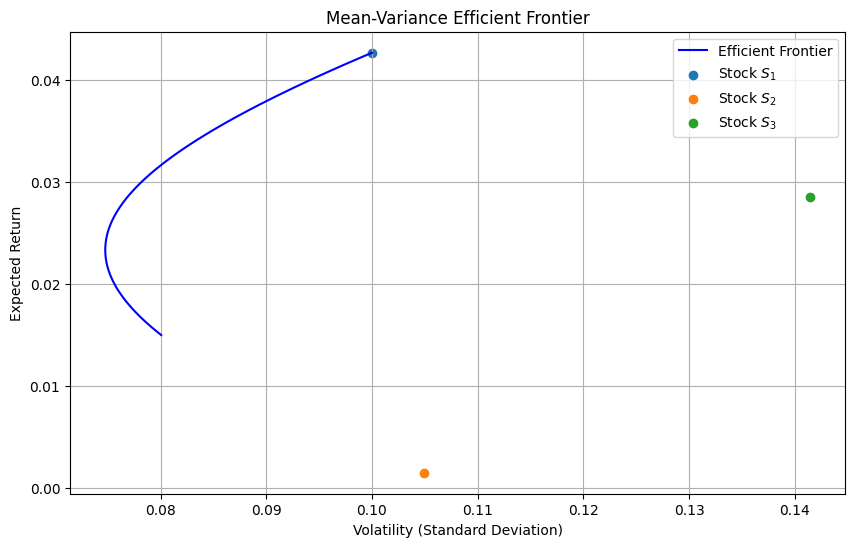

In [28]:
# Generate portfolios on the efficient frontier
alphas = np.linspace(0, 1, 100)
portfolio_weights = np.array([alpha * optimal_weights_P1 + (1 - alpha) * optimal_weights_P2 for alpha in alphas])
portfolio_returns = np.dot(portfolio_weights, mu)
portfolio_volatilities = np.array([np.sqrt(np.dot(weights.T, np.dot(Sigma, weights))) for weights in portfolio_weights])

# Plotting the Efficient Frontier
plt.figure(figsize=(10, 6))
plt.plot(portfolio_volatilities, portfolio_returns, 'b-', label='Efficient Frontier')
plt.xlabel('Volatility (Standard Deviation)')
plt.ylabel('Expected Return')
plt.title('Mean-Variance Efficient Frontier')

# Plot individual securities
for i in range(len(mu)):
    std_dev = np.sqrt(Sigma[i, i])
    plt.scatter(std_dev, mu[i], marker='o', label=f'Stock $S_{i+1}$')

plt.legend()
plt.grid(True)
plt.show()

#### 3.5 Risk-Free Rate

a.

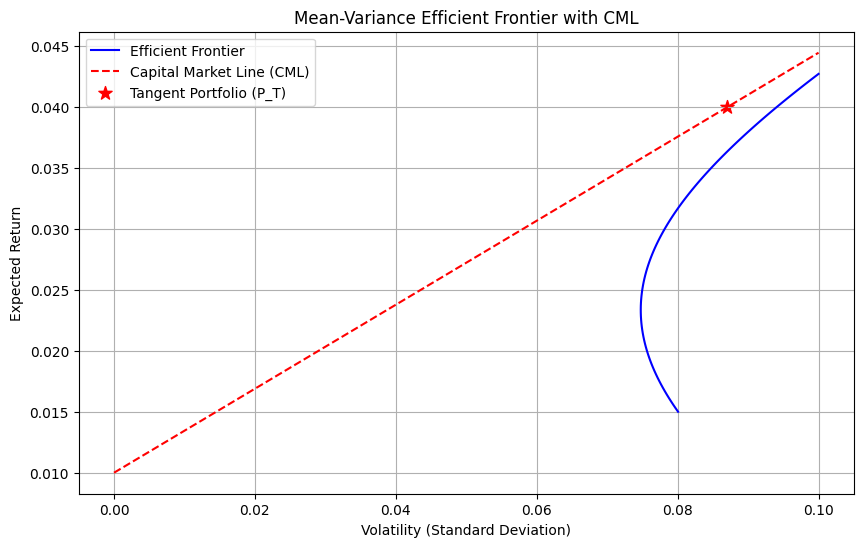

In [32]:
rf = 0.01  # Risk-free rate

# Objective function to maximize Sharpe ratio
def negative_sharpe_ratio(weights, mu, Sigma, rf):
    portfolio_return = np.dot(weights, mu)
    portfolio_volatility = np.sqrt(np.dot(weights.T, np.dot(Sigma, weights)))
    sharpe_ratio = (portfolio_return - rf) / portfolio_volatility
    return -sharpe_ratio  # Minimize negative Sharpe ratio

# Constraint: Weights must sum to 1
def weights_sum_constraint(weights):
    return np.sum(weights) - 1

# Initial weights and constraints
initial_weights = np.ones(len(mu)) / len(mu)
cons = {'type': 'eq', 'fun': weights_sum_constraint}
bounds = tuple((0, 1) for _ in mu)

# Find the Tangent Portfolio (P_T)
result = minimize(negative_sharpe_ratio, initial_weights, args=(mu, Sigma, rf), method='SLSQP', bounds=bounds, constraints=cons)
optimal_weights_PT = result.x
portfolio_return_PT = np.dot(optimal_weights_PT, mu)
portfolio_volatility_PT = np.sqrt(np.dot(optimal_weights_PT.T, np.dot(Sigma, optimal_weights_PT)))

# Generate the CML
cml_x = np.linspace(0, max(portfolio_volatility_PT, max(portfolio_volatilities)), 100)
cml_y = rf + (portfolio_return_PT - rf) / portfolio_volatility_PT * cml_x

# Plotting the Efficient Frontier and CML
plt.figure(figsize=(10, 6))
plt.plot(portfolio_volatilities, portfolio_returns, 'b-', label='Efficient Frontier')
plt.plot(cml_x, cml_y, 'r--', label='Capital Market Line (CML)')
plt.scatter(portfolio_volatility_PT, portfolio_return_PT, color='red', marker='*', s=100, label='Tangent Portfolio (P_T)')
plt.xlabel('Volatility (Standard Deviation)')
plt.ylabel('Expected Return')
plt.title('Mean-Variance Efficient Frontier with CML')
plt.legend()
plt.grid(True)
plt.show()

##### Conceptual Basis of the CML

- **Purpose of CML:** The CML represents portfolios that optimally combine the risk-free asset and the portfolio of risky assets that provides the highest Sharpe ratio (P_T).
- **Slope of CML:** Determined by the Sharpe ratio of $P_T$, which measures the best possible reward-to-variability ratio achievable by investing between the risk-free asset and $P_T$.

##### Characteristics of the Tangent Portfolio (P_T)

- **Highest Sharpe Ratio:** $P_T$ is located on the efficient frontier and is the portfolio that maximizes the Sharpe ratio, calculated as $\frac{\mu_P - r_f}{\sigma_P}$ where:
  - $\mu_P$ is the return of the portfolio,
  - $r_f$ is the risk-free rate,
  - $\sigma_P$ is the standard deviation of the portfolio.
- **Tangency Point:** The line drawn from the risk-free rate with the slope equal to the Sharpe ratio of $P_T$ is tangent to the efficient frontier at $P_T$.

##### Geometric and Financial Implications

- **Geometric Interpretation:** Geometrically, a tangent line to a curve at a point touches the curve only at that point and does not intersect it elsewhere nearby, demonstrating that $P_T$ is uniquely positioned to offer the highest returns for its level of risk.
- **Financial Implication:** Financially, this indicates that any combination of risk-free assets and risky assets, other than $P_T$, would result in either more risk for the same return or less return for the same risk, and hence would not lie on the CML.

##### Visual Confirmation

- **Visualization in the Plot:** In the plot, the CML starts at the risk-free rate and only touches the efficient frontier at $P_T$. Beyond this point, investors seeking higher returns for higher risks will continue along the efficient frontier but will not meet the CML again, reaffirming the principles of optimal risk-adjusted returns and diversification.

b/c/d.

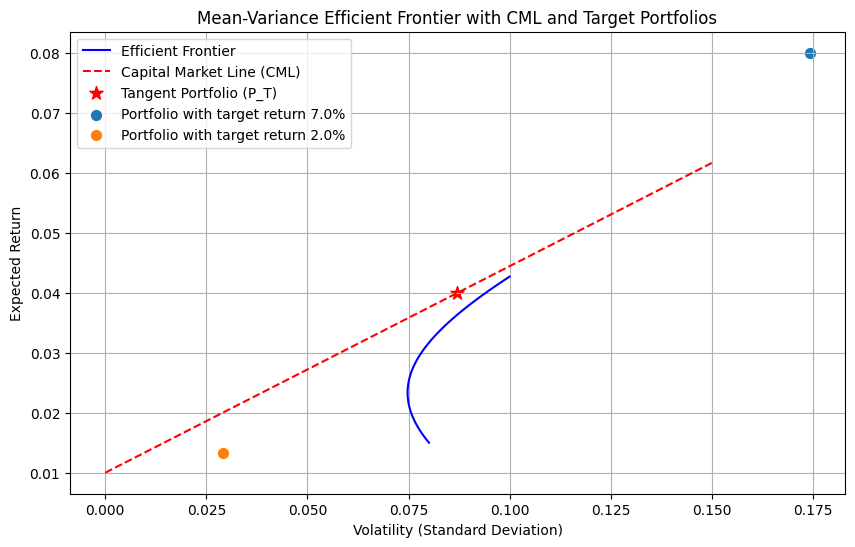

In [35]:
# Define target returns for P3 and P4
target_returns = [0.07, 0.02]  # 7% and 2% target returns

# Calculate weights for P3 and P4
portfolios = {}
for target_return in target_returns:
    alpha = (target_return - rf) / (portfolio_return_PT - rf)
    weight = alpha * optimal_weights_PT + (1 - alpha) * np.zeros(len(mu))
    portfolios[target_return] = weight

# Generate the CML
cml_x = np.linspace(0, 0.15, 100)
cml_y = rf + (portfolio_return_PT - rf) / portfolio_volatility_PT * cml_x

# Plotting the Efficient Frontier, CML, P3, and P4
plt.figure(figsize=(10, 6))
plt.plot(portfolio_volatilities, portfolio_returns, 'b-', label='Efficient Frontier')
plt.plot(cml_x, cml_y, 'r--', label='Capital Market Line (CML)')
plt.scatter(portfolio_volatility_PT, portfolio_return_PT, color='red', marker='*', s=100, label='Tangent Portfolio (P_T)')

# Plot P3 and P4
for ret, weights in portfolios.items():
    port_return = np.dot(weights, mu)
    port_volatility = np.sqrt(np.dot(weights.T, np.dot(Sigma, weights)))
    plt.scatter(port_volatility, port_return, marker='o', s=50, label=f'Portfolio with target return {ret*100:.1f}%')

plt.xlabel('Volatility (Standard Deviation)')
plt.ylabel('Expected Return')
plt.title('Mean-Variance Efficient Frontier with CML and Target Portfolios')
plt.legend()
plt.grid(True)
plt.show()